In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('d:\\Data Science\\Kaggle\\Houses\\train.csv')
test = pd.read_csv('d:\\Data Science\\Kaggle\\Houses\\test.csv')

In [3]:
#1460 train, 1459 test set
df = train.merge(test)

In [4]:
df = pd.concat([train, test], axis = 0)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

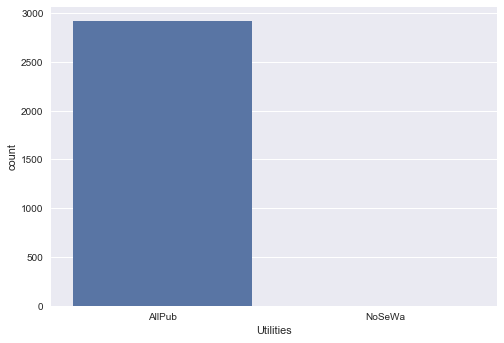

In [143]:
df.Utilities = df.Utilities.fillna('AllPub')
sns.countplot(df.Utilities)

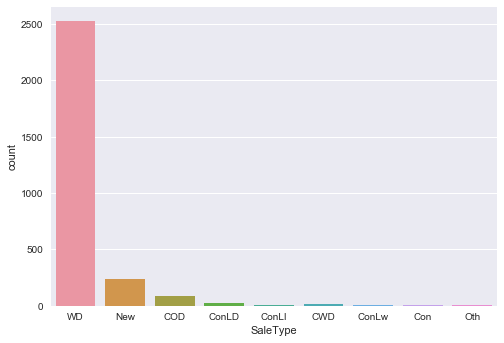

In [139]:
df.SaleType = df.SaleType.fillna('WD')
sns.countplot(df.SaleType)

In [5]:
df.PoolQC = df.PoolQC.fillna('absent')
df.Fence = df.Fence.fillna('absent')
df.MiscFeature = df.MiscFeature.fillna('absent')
df.Alley = df.Alley.fillna('absent')

In [6]:
df.BsmtQual = df.BsmtQual.fillna('absent')
df.BsmtCond = df.BsmtCond.fillna('absent')
df.BsmtExposure = df.BsmtExposure.fillna('absent')
df.BsmtFinType1 = df.BsmtFinType1.fillna('absent')
df.BsmtFinType2 = df.BsmtFinType2.fillna('absent')

In [112]:
df.BsmtFinSF1 = df.BsmtFinSF1.fillna(0.0)
df.BsmtFinSF2 = df.BsmtFinSF2.fillna(0.0)
df.BsmtFullBath = df.BsmtFullBath.fillna(df.BsmtFullBath.median())
df.BsmtHalfBath = df.BsmtHalfBath.fillna(df.BsmtHalfBath.median())
df.GarageArea = df.GarageArea.fillna(df.GarageArea.median()) #1116
df.GarageCars = df.GarageCars.fillna(df.GarageCars.median()) 
df.KitchenQual = df.KitchenQual.fillna('TA')
df.BsmtUnfSF = df.BsmtUnfSF.fillna(0.0)
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())
df.MSZoning = df.MSZoning.fillna('RL')

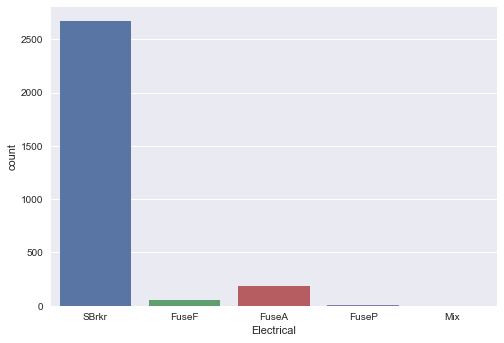

In [9]:
sns.countplot(df.Electrical)
df.Electrical = df.Electrical.fillna('SBrkr')

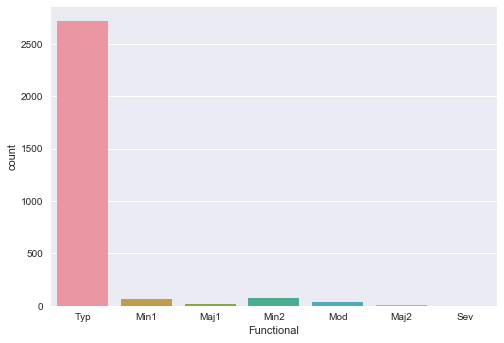

In [15]:
sns.countplot(df.Functional)
df.Functional = df.Functional.fillna('Typ')


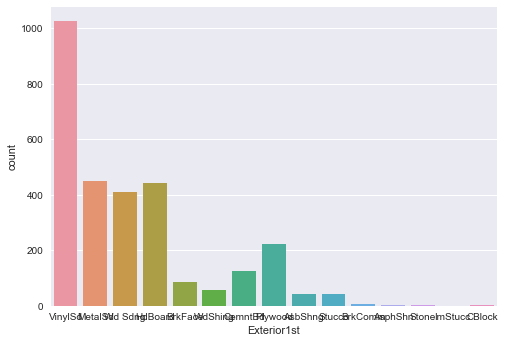

In [10]:
df.Exterior1st = df.Exterior1st.fillna('VinylSd')
sns.countplot(df.Exterior1st)

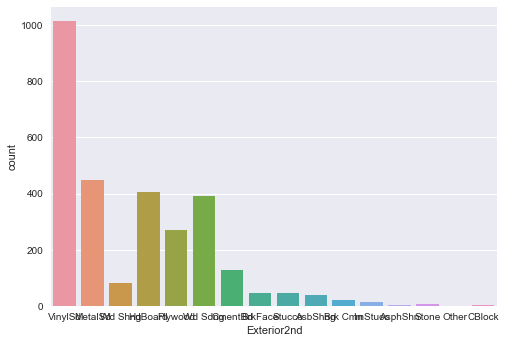

In [11]:
df.Exterior2nd = df.Exterior2nd.fillna('VinylSd')
sns.countplot(df.Exterior2nd)

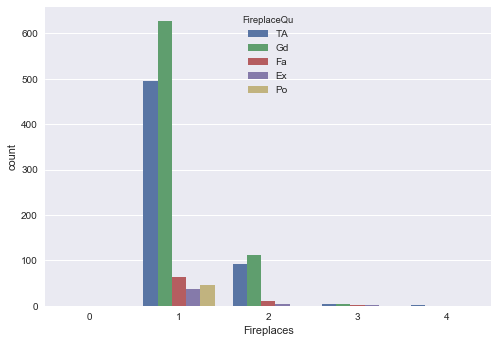

In [12]:
sns.countplot(x = 'Fireplaces', hue = 'FireplaceQu', data= df)
df.FireplaceQu = df.FireplaceQu.fillna('absent')

In [21]:
garage = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']
for i in garage:
    df[i] = df[i].fillna('absent')

In [ ]:
df[df.]

In [116]:
garage = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']
#df[(df.GarageArea == 480.0)].iloc[:, 31:40]

In [48]:
df.GarageCond = np.where((df.GarageArea == 480.0) & (df.GarageCond == 'absent'), 'TA', df.GarageCond )

In [51]:
df.GarageFinish = np.where((df.GarageArea == 480.0) & (df.GarageFinish == 'absent'), df.GarageFinish.mode(), df.GarageFinish )
df.GarageQual = np.where((df.GarageArea == 480.0) & (df.GarageQual == 'absent'), df.GarageQual.mode(), df.GarageQual )
#df.GarageYrBlt = np.where((df.GarageArea == 480.0) & (df.GarageYrBlt == 'absent'), 'TA', df.GarageYrBlt )

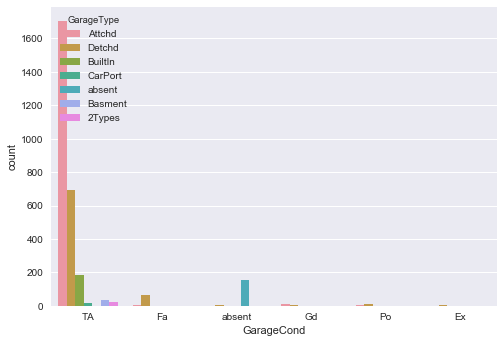

In [46]:
sns.countplot('GarageCond', hue = 'GarageType', data = df)

In [58]:
df['GarageYrBlt'] = np.where(df.GarageYrBlt == 'absent', 0 , df.GarageYrBlt)

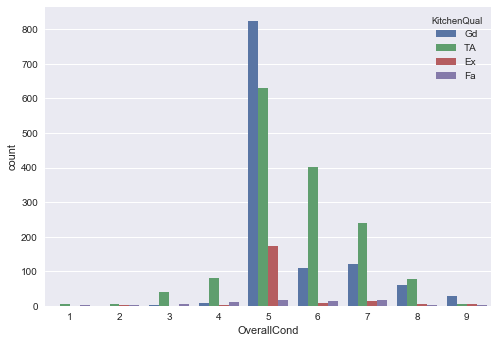

In [83]:
sns.countplot('OverallCond', hue = 'KitchenQual', data = df)

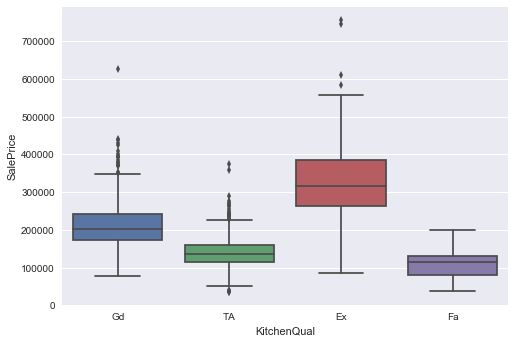

In [63]:
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)

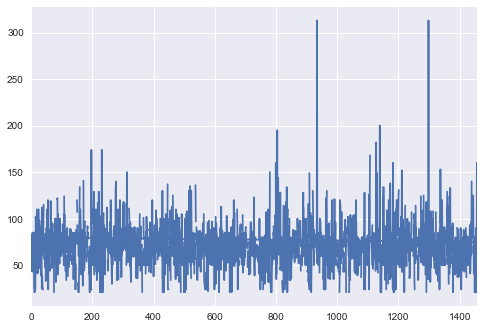

In [86]:
df.LotFrontage.plot()

In [91]:
df.LotFrontage.groupby(df['MSZoning']).describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),23.0,65.608696,16.317139,50.0,60.0,60.0,66.0,120.0
FV,119.0,59.529412,25.298832,24.0,34.0,65.0,77.0,114.0
RH,23.0,55.434783,17.616692,26.0,44.0,60.0,65.0,82.0
RL,1839.0,74.052202,22.033990,22.0,60.0,72.0,82.5,313.0
RM,426.0,52.246479,19.314190,21.0,42.5,52.0,60.0,153.0


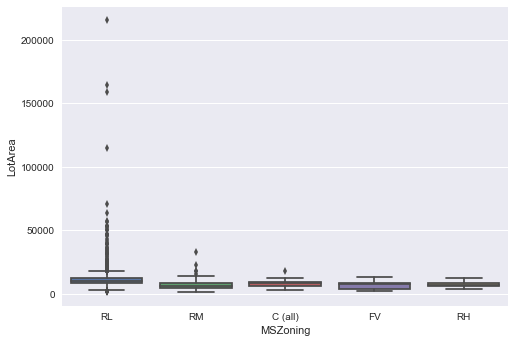

In [118]:
sns.boxplot(x = df.MSZoning, y = df.LotArea)

In [124]:
df.MasVnrArea.corr(df.SalePrice)

0.47749304709571594

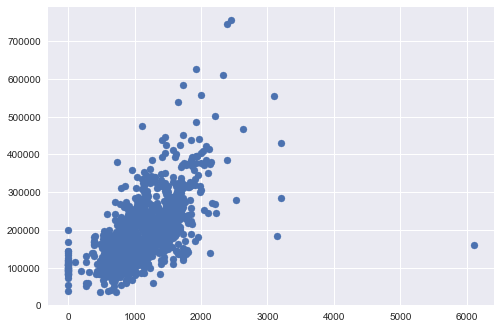

In [146]:
plt.scatter(df1.TotalBsmtSF, df1.SalePrice)

In [148]:
df[df.TotalBsmtSF.isnull()][['BsmtQual', 'TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
660,absent,NaN


In [149]:
df.TotalBsmtSF = df.TotalBsmtSF.fillna(0.0)

In [128]:
df.MasVnrArea = df.MasVnrArea.fillna(0.0)

In [131]:
df.MasVnrType = df.MasVnrType.fillna('absent')
df.MasVnrType = np.where(df.MasVnrType == 'None', 'absent', df.MasVnrType)

In [154]:
#df[df.SalePrice.isnull()]

In [155]:
df['Remodelled_ago'] = df.YearRemodAdd - df.YearBuilt

In [161]:
df['Sold_ago'] = 2017 -  df.YrSold

In [157]:
df['Garage_ago'] = df.GarageYrBlt - df.YearBuilt

In [162]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Remodelled_ago,Sold_ago,Garage_ago
0,856,854,0,absent,3,1Fam,TA,No,706.0,0.0,...,8,856.0,AllPub,0,2003,2003,2008,0,9,0
1,1262,0,0,absent,3,1Fam,TA,Gd,978.0,0.0,...,6,1262.0,AllPub,298,1976,1976,2007,0,10,0
2,920,866,0,absent,3,1Fam,TA,Mn,486.0,0.0,...,6,920.0,AllPub,0,2001,2002,2008,1,9,0
3,961,756,0,absent,3,1Fam,Gd,No,216.0,0.0,...,7,756.0,AllPub,0,1915,1970,2006,55,11,83
4,1145,1053,0,absent,4,1Fam,TA,Av,655.0,0.0,...,9,1145.0,AllPub,192,2000,2000,2008,0,9,0


In [163]:
df_res = df

In [165]:
df = df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' ], axis = 1)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF          2919 non-null int64
2ndFlrSF          2919 non-null int64
3SsnPorch         2919 non-null int64
Alley             2919 non-null object
BedroomAbvGr      2919 non-null int64
BldgType          2919 non-null object
BsmtCond          2919 non-null object
BsmtExposure      2919 non-null object
BsmtFinSF1        2919 non-null float64
BsmtFinSF2        2919 non-null float64
BsmtFinType1      2919 non-null object
BsmtFinType2      2919 non-null object
BsmtFullBath      2919 non-null float64
BsmtHalfBath      2919 non-null float64
BsmtQual          2919 non-null object
BsmtUnfSF         2919 non-null float64
CentralAir        2919 non-null object
Condition1        2919 non-null object
Condition2        2919 non-null object
Electrical        2919 non-null object
EnclosedPorch     2919 non-null int64
ExterCond         2919 non-null object
ExterQual         2919 non-null obj

(array([  29.,  254.,  477.,  320.,  171.,   93.,   57.,   25.,   16.,    8.]),
 array([  34900.,   78910.,  122920.,  166930.,  210940.,  254950.,
         298960.,  342970.,  386980.,  430990.,  475000.]),
 <a list of 10 Patch objects>)

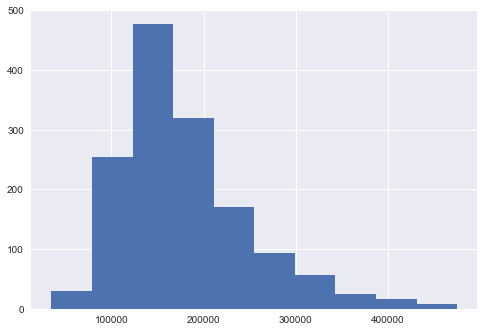

In [202]:
df1= df.dropna()
plt.hist(df1[df1.SalePrice < 480000].SalePrice)

In [188]:
df1['Log_SalePrice'] = np.log(1+df1.SalePrice)

c:\programdata\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [193]:
from scipy.stats import skew, kurtosis

In [201]:
skew(df1[df1.SalePrice <450000].SalePrice), kurtosis(df1[df1.SalePrice <450000].SalePrice)

(1.1088861305688527, 1.3234262326001511)

In [210]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,Remodelled_ago,Sold_ago,Garage_ago
0,856,854,0,absent,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,0,9,0
1,1262,0,0,absent,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,0,10,0
2,920,866,0,absent,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,1,9,0
3,961,756,0,absent,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,55,11,83
4,1145,1053,0,absent,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,0,9,0


In [214]:
df.to_csv('Houses.csv', index = False)